## Stock Price Prediction And Forecasting Using Stacked LSTM
A Machine Learning Model for Stock Market Prediction. Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on a financial exchange

Here i had taken the APPLE stock data for analysis


In [1]:
#import libraries
import pandas as pd
df=pd.read_csv('AAPL.csv')

In [2]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


Here i have used the 'high ' column of dataset  you can choose anyone of them

In [4]:
df1=df.reset_index()['high']

In [5]:
df1.head()

0    132.260
1    131.950
2    131.450
3    131.390
4    130.655
Name: high, dtype: float64

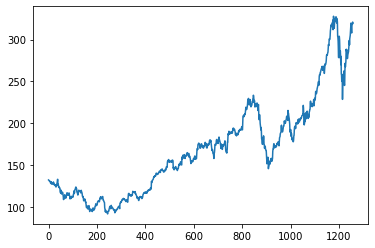

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
print(df1.shape)
import numpy as np
np.array(df1).reshape(-1,1).shape

(1258,)


(1258, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       ...,
       [0.96473029],
       [0.97053095],
       [0.96350241]])

In [10]:
# since the probelm statement is based on timeseries we simply cant use train.split 
len(df1)

1258

 this dataset is data sensitive,train_Test_split  shuffle the dataset before splitting dataset so I have used the following steps

In [11]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:int(training_size),:],df1[training_size:len(df1),:1]


In [12]:
training_size,test_size

(817, 441)

In [13]:
train_data.shape,test_data.shape

((817, 1), (441, 1))

In [14]:
def dataset(dataset,timestap=100):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestap-1):
        a=dataset[i:(i+timestap),0]
        dataX.append(a)
        b=dataset[i+timestap,0]
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

        

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = dataset(train_data, time_step)
X_test, ytest = dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
X_train.shape

(716, 100, 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 227ms/step - loss: 0.0196 - val_loss: 0.0681
Epoch 2/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0040 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 4/100
12/12 [==============================] - 2s 131ms/step - loss: 8.1310e-04 - val_loss: 0.0052
Epoch 5/100
12/12 [==============================] - 2s 139ms/step - loss: 6.5407e-04 - val_loss: 0.0057
Epoch 6/100
12/12 [==============================] - 1s 123ms/step - loss: 6.2182e-04 - val_loss: 0.0050
Epoch 7/100
12/12 [==============================] - 1s 118ms/step - loss: 6.0823e-04 - val_loss: 0.0039
Epoch 8/100
12/12 [==============================] - 1s 120ms/step - loss: 5.9147e-04 - val_loss: 0.0040
Epoch 9/100
12/12 [==============================] - 2s 127ms/step - loss: 5.8674e-04 - val_loss: 0.0053
Epoch 10/100
12/12 [==============================] - 2s 136ms/step

12/12 [==============================] - 2s 178ms/step - loss: 2.5359e-04 - val_loss: 0.0019
Epoch 79/100
12/12 [==============================] - 2s 195ms/step - loss: 2.5552e-04 - val_loss: 0.0012
Epoch 80/100
12/12 [==============================] - 2s 204ms/step - loss: 2.1508e-04 - val_loss: 0.0010
Epoch 81/100
12/12 [==============================] - 2s 195ms/step - loss: 2.0526e-04 - val_loss: 0.0012
Epoch 82/100
12/12 [==============================] - 2s 187ms/step - loss: 2.1624e-04 - val_loss: 0.0016
Epoch 83/100
12/12 [==============================] - 2s 189ms/step - loss: 1.9022e-04 - val_loss: 0.0015
Epoch 84/100
12/12 [==============================] - 2s 189ms/step - loss: 1.8222e-04 - val_loss: 9.7229e-04
Epoch 85/100
12/12 [==============================] - 2s 181ms/step - loss: 1.9105e-04 - val_loss: 0.0016
Epoch 86/100
12/12 [==============================] - 2s 174ms/step - loss: 2.0149e-04 - val_loss: 0.0010
Epoch 87/100
12/12 [==============================] - 2

In [24]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.47063935357633

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))
len(train_predict)

716

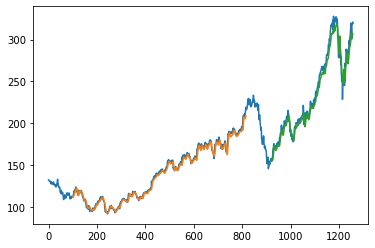

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[100:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test_data)

441

In [31]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
x_input

array([[0.85532221, 0.8846219 , 0.88453722, 0.8819121 , 0.88589212,
        0.90088026, 0.9262427 , 0.93572699, 0.95435685, 0.95647388,
        0.94770937, 0.94855619, 0.96142772, 0.96261326, 0.9667203 ,
        0.96489965, 0.98086205, 0.93191633, 0.95998814, 1.        ,
        0.98407994, 0.97810992, 0.93919892, 0.96523838, 0.98691676,
        0.98886443, 0.98115844, 0.97332543, 0.98327547, 0.99733254,
        0.99309848, 0.99208231, 0.96570412, 0.98611229, 0.98645101,
        0.96866797, 0.89977983, 0.89279363, 0.87310526, 0.82280464,
        0.79066813, 0.88817851, 0.8990177 , 0.89647726, 0.88017614,
        0.8432128 , 0.78931324, 0.82466763, 0.80256584, 0.7550597 ,
        0.79706156, 0.70882378, 0.70259971, 0.67037852, 0.68240325,
        0.67812685, 0.57934499, 0.66059785, 0.70530951, 0.70713015,
        0.69523245, 0.69375053, 0.72326192, 0.66495893, 0.64984334,
        0.65217207, 0.72588704, 0.7622576 , 0.74392413, 0.75535608,
        0.77072572, 0.83233127, 0.82420188, 0.83

In [33]:
temp_input=x_input
temp_input=temp_input[0].tolist()


In [34]:
temp_input[1:5]

[0.855322211872301,
 0.8846218985519521,
 0.8845372173765771,
 0.8819121009399611,
 0.8858921161825726,
 0.9008802608180202,
 0.9262426962486241,
 0.935726987890592,
 0.954356846473029,
 0.956473875857397,
 0.947709374206114,
 0.948556185959861,
 0.9614277246168177,
 0.9626132610720637,
 0.9667202980777374,
 0.9648996528071809,
 0.9808620543653146,
 0.9319163349987298,
 0.9599881446354475,
 1.0000000000000002,
 0.9840799390295536,
 0.9781099161656364,
 0.9391989160809553,
 0.9652383775086799,
 0.9869167584046066,
 0.9888644254382253,
 0.9811584384791261,
 0.9733254297569651,
 0.9832754678634938,
 0.9973325429756967,
 0.993098484206961,
 0.9920823101024643,
 0.9657041239732409,
 0.9861122872385468,
 0.9864510119400456,
 0.9686679651113557,
 0.8997798289440258,
 0.8927936319756118,
 0.8731052587009909,
 0.8228046405284106,
 0.7906681344737065,
 0.88817850791769,
 0.8990176983656533,
 0.8964772631044118,
 0.8801761368447796,
 0.8432128037937168,
 0.789313235667711,
 0.8246676263866544,
 0

## predicting stock price for next 100 days

In [35]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
#         print(temp_input)

        x_input=np.array(temp_input[1:])
        print(x_input.shape)
        print("{} day input {} ".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        print(x_input.shape)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print(yhat.shape)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.92706597]
101
(100,)
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.8957

(1, 1)
10 day output [[0.81268793]]
(100,)
11 day input [0.94855619 0.96142772 0.96261326 0.9667203  0.96489965 0.98086205
 0.93191633 0.95998814 1.         0.98407994 0.97810992 0.93919892
 0.96523838 0.98691676 0.98886443 0.98115844 0.97332543 0.98327547
 0.99733254 0.99309848 0.99208231 0.96570412 0.98611229 0.98645101
 0.96866797 0.89977983 0.89279363 0.87310526 0.82280464 0.79066813
 0.88817851 0.8990177  0.89647726 0.88017614 0.8432128  0.78931324
 0.82466763 0.80256584 0.7550597  0.79706156 0.70882378 0.70259971
 0.67037852 0.68240325 0.67812685 0.57934499 0.66059785 0.70530951
 0.70713015 0.69523245 0.69375053 0.72326192 0.66495893 0.64984334
 0.65217207 0.72588704 0.7622576  0.74392413 0.75535608 0.77072572
 0.83233127 0.82420188 0.83210898 0.82680583 0.80451351 0.78575663
 0.78850876 0.80480989 0.8101448  0.81662291 0.82208485 0.83834364
 0.85892116 0.8778474  0.85536455 0.88631552 0.89579981 0.90397155
 0.92590397 0.95427217 0.96544161 0.9496147  0.9235329  0.91553053
 0.951

(1, 1)
20 day output [[0.8080938]]
(100,)
21 day input [0.97810992 0.93919892 0.96523838 0.98691676 0.98886443 0.98115844
 0.97332543 0.98327547 0.99733254 0.99309848 0.99208231 0.96570412
 0.98611229 0.98645101 0.96866797 0.89977983 0.89279363 0.87310526
 0.82280464 0.79066813 0.88817851 0.8990177  0.89647726 0.88017614
 0.8432128  0.78931324 0.82466763 0.80256584 0.7550597  0.79706156
 0.70882378 0.70259971 0.67037852 0.68240325 0.67812685 0.57934499
 0.66059785 0.70530951 0.70713015 0.69523245 0.69375053 0.72326192
 0.66495893 0.64984334 0.65217207 0.72588704 0.7622576  0.74392413
 0.75535608 0.77072572 0.83233127 0.82420188 0.83210898 0.82680583
 0.80451351 0.78575663 0.78850876 0.80480989 0.8101448  0.81662291
 0.82208485 0.83834364 0.85892116 0.8778474  0.85536455 0.88631552
 0.89579981 0.90397155 0.92590397 0.95427217 0.96544161 0.9496147
 0.9235329  0.91553053 0.95194343 0.96049623 0.96473029 0.97053095
 0.96350241 0.92706597 0.91503531 0.89665544 0.87739062 0.85959035
 0.84436

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
import matplotlib.pyplot as plt

In [38]:
len(df1)

1258

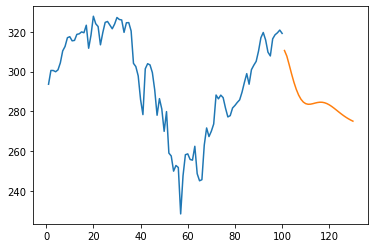

In [39]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

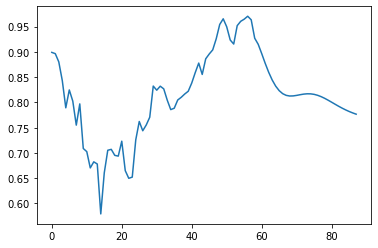

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

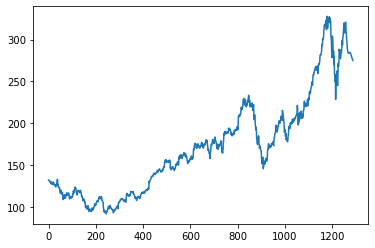

In [42]:
plt.plot(df3)